In [1]:
import numpy as np
import pandas as pd 
import re
import nltk
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
df =pd.read_csv("googleplaystore_user_reviews.csv",encoding="latin1")
df.dropna(axis = 0, inplace = True)

X, y = df.Translated_Review, df.Sentiment
text_list = []
for i in df.Translated_Review :
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower() 
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) 
    text_list.append(review) 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\92344\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(text_list).toarray()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1296   56  335]
 [  19  893  148]
 [  76   79 4584]]
              precision    recall  f1-score   support

    Negative       0.93      0.77      0.84      1687
     Neutral       0.87      0.84      0.86      1060
    Positive       0.90      0.97      0.93      4739

    accuracy                           0.90      7486
   macro avg       0.90      0.86      0.88      7486
weighted avg       0.91      0.90      0.90      7486

0.9047555436815389


In [4]:
import pandas as pd
import string
import numpy as np
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def clean_text(text):
    #lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

data = pd.read_csv('Datascraping.csv')
data['review_clean'] = data['content'].apply(lambda review: clean_text(str(review)))


In [5]:
pos = 0
neg = 0
net = 0
total = 0
def cal_sentiment_polarity(text):
    sentiment = " "
    global  pos 
    global  neg 
    global  net
    result = classifier.predict(tfidfconverter.transform([text]))
    if(result == "Positive"):
        pos = pos + 1
        sentiment = "Positive"
    elif(result == "Negative"):
        neg = neg + 1
        sentiment = "Negative"
    elif(result == "Neutral"):
        sentiment = "Neutral"
        net = net + 1
    return sentiment

df = pd.DataFrame({
    'id': list(data.index.values),
    'Reviews': data['review_clean'],       
    'Polarity': [cal_sentiment_polarity(x) for x in data['review_clean']],
    
})
total = pos + neg +net
print("Total Numbers of Reviews" , total)
print("Positive Reviews ",pos)
print("Negative Reviews " ,neg)
print("Neutral Reviews " ,net)
df.head(50)

Total Numbers of Reviews 9433
Positive Reviews  7381
Negative Reviews  344
Neutral Reviews  1708


,id,Reviews,Polarity
0,0,really love app make lot great friend people s...,Positive
1,1,love app pretty cool thing could make good add...,Positive
2,2,app great super fresh concept reason i'm give ...,Positive
3,3,really love app since help find language partn...,Positive
4,4,really cool idea execute well ui great moderat...,Positive
5,5,really enjoy app there's something relax comfo...,Positive
6,6,app amaze app developer read review really wan...,Positive
7,7,good app people want exp penpals digitally lov...,Positive
8,8,like app brings back typical old-style send le...,Positive
9,9,love app far favorite penpal app/site i've eve...,Positive


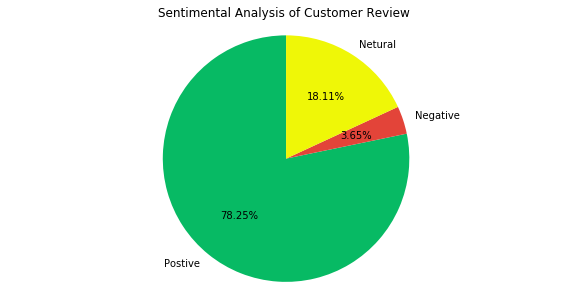

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
labels = ['Postive','Negative','Netural'] 
data = [pos,neg,net] 
fig = plt.figure(figsize = (10,5)) 
colors = ['#07ba64','#e34439','#eff707']
plt.subplot( title='Sentimental Analysis of Customer Review ')
plt.pie(data, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90) 
plt.axis("equal")
plt.show()